In [5]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 638.9 kB/s eta 0:00:00m eta 0:00:010:00:09
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 924.4 kB/s eta 0:00:00eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 860.4 kB/s eta 0:00:0031m2.3 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:00m 

In [89]:
import time

import pandas as pd
import numpy as np
import tensorflow_addons as tfa

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import RandomTranslation, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, TerminateOnNaN
from tensorflow.keras.optimizers import SGD

from tensorflow.data import AUTOTUNE
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist

from sklearn.model_selection import train_test_split



In [101]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [102]:
SIZE = 28
SIZE2 = 28

SEED = 51

tf.random.set_seed(SEED)

In [103]:
(X_train_raw, y_train_raw),(X_test_raw, y_test_raw) = mnist.load_data()

In [ ]:
for data in X_train_raw:
    print(data)

In [93]:
X_train_raw.shape

(60000, 28, 28)

In [95]:
from PIL import Image
import numpy as np

img = Image.fromarray(X_train_raw[0], 'RGB')
img.save('my.png')
img.show()

ValueError: not enough image data

In [96]:
X_train_full = np.concatenate((X_train_raw, X_test_raw))
y_train_full = np.concatenate((y_train_raw, y_test_raw))

In [97]:
valid = pd.read_csv('train.csv').to_numpy()
test = pd.read_csv('test.csv').to_numpy()
sample_submission = pd.read_csv('sample_submission.csv').to_numpy()


In [98]:
y_train_full

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [99]:
train_Y = tf.keras.utils.to_categorical(y_train_full)
valid_Y = tf.keras.utils.to_categorical(valid[:,0])


In [100]:
img = Image.fromarray(X_train_full[0], 'RGB')
img.save('my.png')
img.show()

ValueError: not enough image data

In [52]:
train_X = X_train_full / 255.0
valid_X = valid[:,1:] / 255.0

In [53]:
test_X = test / 255.0

In [54]:
train_X = train_X.reshape(-1, SIZE, SIZE2, 1)
test_X = test_X.reshape(-1, SIZE, SIZE2, 1)
valid_X = valid_X.reshape(-1, SIZE, SIZE2, 1)

In [88]:
train_X[0].shape

(28, 28, 1)

In [86]:
img = Image.fromarray(train_X[0], 'RGB')
img.save('my.png')
img.show()


(eog:89386): Gtk-WARNING **: 22:45:04.942: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.

(eog:89386): EOG-WARNING **: 22:45:04.942: Couldn't load icon: Failed to load /home/ghost17/.local/share/icons/Zafiro-Icons-Dark/actions/16-Dark/image-loading.svg: Unable to load image-loading module: /snap/code/106/usr/lib/x86_64-linux-gnu/gdk-pixbuf-2.0/2.10.0/loaders/libpixbufloader-svg.so: /snap/core/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_vfork, version GLIBC_PRIVATE

(eog:89386): EOG-WARNING **: 22:45:04.942: Couldn't load icon: Failed to load /home/ghost17/.local/share/icons/Zafiro-Icons-Dark/actions/16-Dark/image-missing.svg: Unable to load image-loading module: /snap/code/106/usr/lib/x86_64-linux-gnu/gdk-pixbuf-2.0/2.10.0/loaders/libpixbufloader-svg.so: /snap/core/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_vfork, version GLIBC_PRIVATE
**
Gtk:ERROR:../../../

Bail out! Gtk:ERROR:../../../../gtk/gtkiconhelper.c:494:ensure_surface_for_gicon: assertion failed (error == NULL): Failed to load /home/ghost17/.local/share/icons/Zafiro-Icons-Dark/actions/16-Dark/image-missing.svg: Unable to load image-loading module: /snap/code/106/usr/lib/x86_64-linux-gnu/gdk-pixbuf-2.0/2.10.0/loaders/libpixbufloader-svg.so: /snap/core/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_vfork, version GLIBC_PRIVATE (gdk-pixbuf-error-quark, 5)


In [55]:
print(train_X.shape,valid_X.shape,test_X.shape)

(70000, 28, 28, 1) (42000, 28, 28, 1) (28000, 28, 28, 1)


In [56]:
BS = 128
EPOCHS = 25

STEPS = len(train_X) // BS

LABELS = 10

In [57]:
train_X.shape

(70000, 28, 28, 1)

In [58]:
train_Y.shape

(70000, 10)

In [59]:
valid_y.shape

(42000, 10)

In [60]:
valid_X.shape

(42000, 28, 28, 1)

In [64]:
train_DS = tf.data.Dataset.from_tensor_slices((train_X, train_Y))
valid_DS = tf.data.Dataset.from_tensor_slices((valid_X, valid_Y))

2022-09-11 20:09:44.302875: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 439040000 exceeds 10% of free system memory.
2022-09-11 20:09:50.751887: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 263424000 exceeds 10% of free system memory.


In [65]:
from random import shuffle


train_DS = train_DS.shuffle(STEPS * BS).batch(BS).repeat().prefetch(AUTOTUNE)
valid_DS = valid_DS.batch(BS)

In [67]:
# - An other interessant model can be test (my mdl are minimalists, you can up number of neurons -

class Model:
    
    @staticmethod
    
    def build(height, width, depth):
        model = keras.Sequential()
        
        # Input
        model.add(Input((height, width, depth)))
        
        # CNN LAYERS
        model.add(Conv2D(32, (3, 3), activation = 'relu'))
        model.add(Conv2D(32, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D(2, 2))
        model.add(BatchNormalization())
        
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D(2, 2))
        model.add(BatchNormalization())
        
        model.add(Conv2D(128, (3, 3), activation = 'relu'))
        model.add(MaxPooling2D(2, 2))
        model.add(BatchNormalization())

        model.add(Flatten())
        
        model.add(Dense(128, activation = 'relu'))
        model.add(Dense(128, activation = 'relu'))
        model.add(Dense(10, activation = 'softmax'))
        
        return model


In [68]:
model = Model.build(SIZE, SIZE, 1)
model.summary()

optimizer = SGD(learning_rate=5e-4)

early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3, restore_best_weights=True)

chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)

endNan = tf.keras.callbacks.TerminateOnNaN()

def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

LRS = LearningRateScheduler(scheduler)

LRP = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=3)

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'], steps_per_execution=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          3

In [69]:
%%time

EPOCHS = 40

Mdl1 = model.fit(train_DS, validation_data=valid_DS, epochs=EPOCHS, steps_per_epoch=STEPS, callbacks=[early_stopping, LRS, chkpt, LRP, endNan])

Epoch 1/40
546/546 [==============================] - 77s 130ms/step - loss: 0.3397 - accuracy: 0.9217 - val_loss: 0.2707 - val_accuracy: 0.9518 - lr: 0.0100
Epoch 2/40
546/546 [==============================] - 59s 108ms/step - loss: 0.0817 - accuracy: 0.9788 - val_loss: 0.0616 - val_accuracy: 0.9842 - lr: 0.0100
Epoch 3/40
546/546 [==============================] - 59s 108ms/step - loss: 0.0549 - accuracy: 0.9855 - val_loss: 0.0444 - val_accuracy: 0.9887 - lr: 0.0100
Epoch 4/40
546/546 [==============================] - 59s 108ms/step - loss: 0.0418 - accuracy: 0.9888 - val_loss: 0.0371 - val_accuracy: 0.9908 - lr: 0.0100
Epoch 5/40
546/546 [==============================] - 59s 109ms/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.0300 - val_accuracy: 0.9921 - lr: 0.0100
Epoch 6/40
546/546 [==============================] - 57s 105ms/step - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.0218 - val_accuracy: 0.9951 - lr: 0.0100
Epoch 7/40
546/546 [==============================] 

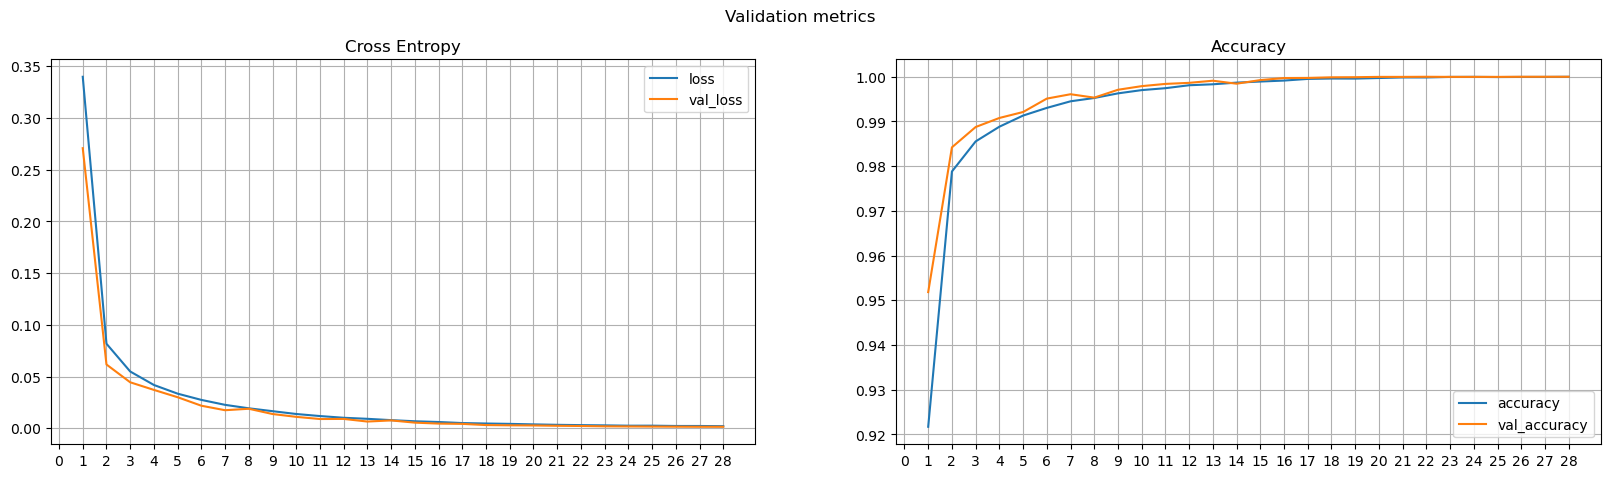

In [71]:

df = pd.DataFrame(Mdl1.history)
df.index +=1

fig = plt.figure(figsize = (20, 5))
fig.suptitle('Validation metrics')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xticks(range(len(df)+1))
ax2.set_xticks(range(len(df)+1))

df[['loss', 'val_loss']].plot(title = "Cross Entropy", grid = True, ax = ax1)
df[['accuracy', 'val_accuracy']].plot(title = "Accuracy", grid = True, ax = ax2)

plt.show()

In [72]:
pred = model.predict(test_X)
classes = pred.argmax(axis=-1)

875/875 [==============================] - 5s 5ms/step


In [75]:
sub = pd.read_csv('sample_submission.csv')
sub.Label = classes
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [76]:
sub.to_csv('submission_3.csv', index = False)